In [318]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

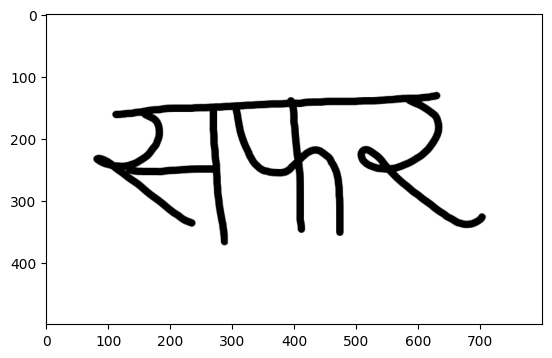

In [319]:
image = cv2.imread('try7.png')
original = image.copy()
original = cv2.resize(original, (800,500))
image = cv2.bitwise_not(image)
image = cv2.resize(image, (800,500))         
plt.imshow(original)

In [320]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#cv2.imshow("gray", gray)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [321]:
blur = cv2.GaussianBlur(gray, (5,5), 0)
#cv2.imshow("blur", blur)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [322]:
kernel = np.ones((1,25),np.uint8)
erosion = cv2.erode(image,kernel,iterations = 1)
cv2.imshow("blur", erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()
kernel = np.ones((11,50),np.uint8)
dilation = cv2.dilate(erosion, kernel, iterations = 1)
cv2.imshow("blur", dilation)
cv2.waitKey(0)
cv2.destroyAllWindows()
canny = cv2.Canny(dilation, 200, 255, 5)
cv2.imshow('canny', canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [323]:
cnts, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest = max(cnts, key=cv2.contourArea)
print(cv2.contourArea(largest))

13276.0


In [324]:
#implement logic to do the following only if 'largest' crosses a certain threshold
#calculate the threshold by hit and trial?
#this is done to prevent horizontal lines being removed when there are multiple numbers being drawn and there is no shirorekha, etc.
if cv2.contourArea(largest)>4000:
    mask = np.zeros_like(original)
    cv2.drawContours(mask, [largest], 0, (255,255,255), thickness=cv2.FILLED)
    mask = 255-mask
    result = cv2.bitwise_and(image, mask)
else:
    result = image
cv2.imshow('result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('removed.png', result)

True

In [325]:
new_img = cv2.imread('removed.png')
new_gray = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
kernel = np.ones((1,1),np.uint8)
erosion = cv2.erode(new_gray,kernel,iterations = 1)
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(erosion, kernel, iterations = 1)
blurred = cv2.GaussianBlur(dilation, (3,13), 0)
canny = cv2.Canny(blurred, 200, 255, 5)
cv2.imshow('dilation',dilation)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [326]:
min_area = 6000

In [327]:
contours, _ = cv2.findContours(blurred, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])
len(contours)
for c in contours:
    print(cv2.contourArea(c))

15585.5
11698.5
11052.5


In [328]:
contour_combination = []
pair = []
for c in contours:
    if cv2.contourArea(c) < min_area:
        contour_combination.append(c)

print(len(contour_combination))

for c in contour_combination:
    pair = [[contour_combination[i], contour_combination[i+1]] for i in range(0, len(contour_combination)-1, 2)]

print(len(pair))
for p in pair:
    x1,y1,w1,h1 = cv2.boundingRect(p[0])
    x2,y2,w2,h2 = cv2.boundingRect(p[1])
    cv2.rectangle(new_img, (x1, y1), (x2 + w2, y2 + h2), (36,255,12), 2)

0
0


In [329]:
for c in contours:
  area = cv2.contourArea(c)
  print(area)
  if area > min_area:
    x,y,w,h = cv2.boundingRect(c)
    #To show bounding boxes
    cv2.rectangle(new_img, (x, y), (x + w, y + h), (36,255,12), 2)

15585.5
11698.5
11052.5


In [330]:
cv2.imshow('boxed',new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [331]:
boxed_original = original.copy()

In [332]:
import os
temp_path = './temp'
if not os.path.exists(temp_path):
    os.makedirs(temp_path)

In [333]:
image_number = 0
for i in range(len(contours)):
    area = cv2.contourArea(contours[i])
    print(area)
    if area > min_area:
        x,y,w,h = cv2.boundingRect(contours[i])
        cv2.rectangle(boxed_original, (x, y), (x + w, y + h), (57,255,20), 3)
        ROI = original[y-20:y+h, x:x+w]
        ###
        adjusted_height = h+20
        square_img = np.zeros((adjusted_height,adjusted_height,3), np.uint8)
        square_img[:,:] = (255,255,255)
        x_offset = int((adjusted_height-w)/2)
        ######Removable
        print('x-offset: ',x_offset)
        print('ROI Shape: ', ROI.shape)
        print('White Image Shape: ', square_img.shape)
        print(square_img.shape)
        ######
        square_img[:,x_offset:x_offset+w] = ROI.copy()
        ######The below line is to display the square segmented images
        cv2.imshow('Square Segmented Image',square_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        ######
        cv2.imwrite("./temp/ROI_{}.png".format(image_number), square_img)
        image_number += 1
        ###
    else:
        for p in pair:
            if cv2.contourArea(p[0]) == area:
                x1,y1,w1,h1 = cv2.boundingRect(p[0])
                x2,y2,w2,h2 = cv2.boundingRect(p[1])
                cv2.rectangle(boxed_original, (x1, y1), (x2 + w2, y2 + h2), (57,255,20), 3)
                ROI = original[y1-20:y2+h2, x1:x2+w2]
                ###
                adjusted_height = ROI.shape[0]
                square_img = np.zeros((adjusted_height,adjusted_height,3), np.uint8)
                square_img[:,:] = (255,255,255)
                x_offset = int((adjusted_height-ROI.shape[1])/2) 
                ######Removable
                print('x-offset: ',x_offset)
                print('ROI Shape: ', ROI.shape)
                print('White Image Shape: ', square_img.shape)
                print(square_img.shape)
                ######
                square_img[:,x_offset:x_offset+ROI.shape[1]] = ROI.copy()
                ###
                ######The below line is to display the square segmented images
                cv2.imshow('Square Segmented Image',square_img)
                cv2.waitKey(0)
                cv2.destroyAllWindows()
                ######
                cv2.imwrite("./temp/ROI_{}.png".format(image_number), square_img)
                image_number += 1

15585.5
x-offset:  11
ROI Shape:  (247, 224, 3)
White Image Shape:  (247, 247, 3)
(247, 247, 3)
11698.5
x-offset:  27
ROI Shape:  (238, 184, 3)
White Image Shape:  (238, 238, 3)
(238, 238, 3)
11052.5
x-offset:  5
ROI Shape:  (225, 214, 3)
White Image Shape:  (225, 225, 3)
(225, 225, 3)


In [334]:
#source = np.zeros((h,w,3), np.uint8)
#white_bg = np.zeros((h,h,3), np.uint8)
#white_bg[:,:] = (255,255,255)
#x_offset = int((h-w)/2)
#print(x_offset)
#white_bg[:,x_offset:x_offset+w] = source.copy()
#cv2.imshow('source',white_bg)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [335]:
cv2.imshow('segmented',boxed_original)
cv2.waitKey(0)
cv2.destroyAllWindows()